In [91]:
import pandas as pd
import numpy as np
import networkx as nx
import json
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
import tweepy
import self

# Download the data
json_data = pd.read_json('covid19_infodemic_english_data.json',lines=True)

json_data

# Removing uncessary columns
interaction_data = json_data.drop(columns=[
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'lang',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'quoted_status',
 'possibly_sensitive',
 'extended_entities','favorited','retweeted'])

json_data

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,possibly_sensitive,extended_entities
0,2020-03-20 15:35:29+00:00,1241025578527903750,1241025578527903744,For the average American the best way to tell ...,False,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,954568,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-19 02:36:13+00:00,1240467080954228737,1240467080954228736,this is fucking bullshit https://t.co/lfLpuNg9GO,False,"[0, 24]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,1505405,False,False,en,1.240119e+18,1.240119e+18,"{'url': 'https://t.co/lfLpuNg9GO', 'expanded':...",{'created_at': 'Wed Mar 18 03:31:09 +0000 2020...,0.0,NaN
2,2020-03-19 19:08:52+00:00,1240716889162018816,1240716889162018816,Can y’all please just follow the government’s ...,False,"[0, 218]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,660762,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-20 18:02:16+00:00,1241062514886090754,1241062514886090752,No offense but the corona virus disappearing b...,False,"[0, 72]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,368883,False,False,en,1.203561e+18,1.203561e+18,"{'url': 'https://t.co/5BtaZrejD2', 'expanded':...",{'created_at': 'Sun Dec 08 06:24:59 +0000 2019...,0.0,NaN
4,2020-03-21 19:30:08+00:00,1241447017945223169,1241447017945223168,This is the face of someone who just spent 9 h...,False,"[0, 268]","{'hashtags': [{'text': 'covid19', 'indices': [...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,445713,False,False,en,NaN,NaN,NaN,NaN,0.0,"{'media': [{'id': 1241447007669104648, 'id_str..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,2020-03-06 07:35:56+00:00,1235831463121059840,1235831463121059840,For example: When Trump invents numbers and ig...,False,"[0, 276]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.235826e+18,1.235826e+18,...,461,False,False,en,1.233605e+18,1.233605e+18,"{'url': 'https://t.co/mPcXvpQubG', 'expanded':...",{'created_at': 'Sat Feb 29 04:09:36 +0000 2020...,0.0,NaN
487,2020-03-06 16:35:12+00:00,1235967176475111432,1235967176475111424,President Trump's comments about the coronavir...,False,"[0, 247]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,278,False,False,en,1.235957e+18,1.235957e+18,"{'url': 'https://t.co/WFtAdmK3rL', 'expanded':...",{'created_at': 'Fri Mar 06 15:53:49 +0000 2020...,0.0,NaN
488,2020-03-06 22:28:55+00:00,1236056191324864515,1236056191324864512,Drug companies reportedly killed a provision i...,False,"[0, 276]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,176,False,False,en,NaN,NaN,NaN,NaN,0.0,NaN
489,2020-03-06 17:54:16+00:00,1235987075440283648,1235987075440283648,Does @twitter have a team fighting covid-19 ru...,False,"[0, 273]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,539,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# Download the other dataset containing the questions
question_data = pd.read_csv('covid19_infodemic_english_data.tsv', delimiter='\t')
question_data

,tweet_id,text,q1_label,q2_label,q3_label,q4_label,q5_label,q6_label,q7_label
0,1241025578527903750,For the average American the best way to tell ...,no,NaN,NaN,NaN,NaN,no_joke_or_sarcasm,no_not_interesting
1,1240467080954228737,this is fucking bullshit,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
2,1240716889162018816,Can y’all please just follow the government’s ...,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
3,1241062514886090754,No offense but the corona virus disappearing b...,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
4,1241447017945223169,This is the face of someone who just spent 9 h...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,1_no_definitely_not_harmful,yes_not_urgent,no_not_harmful,no_not_interesting
...,...,...,...,...,...,...,...,...,...
499,1235967176475111432,President Trump's comments about the coronavir...,yes,4_yes_probably_contains_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,yes_rumor_conspiracy,no_not_interesting
500,1236056191324864515,Drug companies reportedly killed a provision i...,yes,1_no_definitely_contains_no_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities
501,1235987075440283648,Does @twitter have a team fighting covid-19 ru...,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
502,1235959558058754048,#FOX to cause PANDEMIC #FoxNews is spreading ...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_very_urgent,no_not_harmful,no_not_interesting


In [93]:
# Rename tweet id to use as merge index
interaction_data = interaction_data.rename(columns={'id': 'tweet_id'})
interaction_data

,created_at,tweet_id,retweet_count,favorite_count
0,2020-03-20 15:35:29+00:00,1241025578527903750,187425,954568
1,2020-03-19 02:36:13+00:00,1240467080954228737,333831,1505405
2,2020-03-19 19:08:52+00:00,1240716889162018816,160323,660762
3,2020-03-20 18:02:16+00:00,1241062514886090754,154086,368883
4,2020-03-21 19:30:08+00:00,1241447017945223169,126506,445713
...,...,...,...,...
486,2020-03-06 07:35:56+00:00,1235831463121059840,143,461
487,2020-03-06 16:35:12+00:00,1235967176475111432,168,278
488,2020-03-06 22:28:55+00:00,1236056191324864515,125,176
489,2020-03-06 17:54:16+00:00,1235987075440283648,179,539


In [94]:
# Merge the interaction data table with the question data table on shared 'tweet_id' index.
data = interaction_data.merge(question_data, how='inner', on='tweet_id')

# Rename misinformation question columns for easier use.
data = data.rename(columns={'q1_label': 'q1', 'q2_label': 'q2', 'q3_label': 'q3', 'q4_label': 'q4', 'q5_label': 'q5', 'q6_label': 'q6', 'q7_label': 'q7'})
data

,created_at,tweet_id,retweet_count,favorite_count,text,q1,q2,q3,q4,q5,q6,q7
0,2020-03-20 15:35:29+00:00,1241025578527903750,187425,954568,For the average American the best way to tell ...,no,NaN,NaN,NaN,NaN,no_joke_or_sarcasm,no_not_interesting
1,2020-03-19 02:36:13+00:00,1240467080954228737,333831,1505405,this is fucking bullshit,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
2,2020-03-19 19:08:52+00:00,1240716889162018816,160323,660762,Can y’all please just follow the government’s ...,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
3,2020-03-20 18:02:16+00:00,1241062514886090754,154086,368883,No offense but the corona virus disappearing b...,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
4,2020-03-21 19:30:08+00:00,1241447017945223169,126506,445713,This is the face of someone who just spent 9 h...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,1_no_definitely_not_harmful,yes_not_urgent,no_not_harmful,no_not_interesting
...,...,...,...,...,...,...,...,...,...,...,...,...
486,2020-03-06 07:35:56+00:00,1235831463121059840,143,461,For example: When Trump invents numbers and ig...,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
487,2020-03-06 16:35:12+00:00,1235967176475111432,168,278,President Trump's comments about the coronavir...,yes,4_yes_probably_contains_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,yes_rumor_conspiracy,no_not_interesting
488,2020-03-06 22:28:55+00:00,1236056191324864515,125,176,Drug companies reportedly killed a provision i...,yes,1_no_definitely_contains_no_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities
489,2020-03-06 17:54:16+00:00,1235987075440283648,179,539,Does @twitter have a team fighting covid-19 ru...,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting


In [95]:
# Showcases the disparity between true and false tweets within the datasets
data['q1'].value_counts()

yes    299
no     192
Name: q1, dtype: int64

In [96]:
# Compare the average retweet count between those flagged verifiably fake or true
retweet_average = data.groupby('q1', as_index=False)['retweet_count'].mean()
retweet_average

,q1,retweet_count
0,no,25700.026042
1,yes,15163.347826


In [97]:
# Compare the average favorite count between those flagged verifiably fake or true
favorite_average = data.groupby('q1', as_index=False)['favorite_count'].mean()   
favorite_average

,q1,favorite_count
0,no,95456.151042
1,yes,55647.391304


In [98]:
# Create a sperate dataset with verifiable tweets.
verifiable_data = data[data.q1 != "no"]
verifiable_data

,created_at,tweet_id,retweet_count,favorite_count,text,q1,q2,q3,q4,q5,q6,q7
4,2020-03-21 19:30:08+00:00,1241447017945223169,126506,445713,This is the face of someone who just spent 9 h...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,1_no_definitely_not_harmful,yes_not_urgent,no_not_harmful,no_not_interesting
5,2020-03-22 08:06:20+00:00,1241637320325029889,128634,715158,Yesterday I knocked on my Tennant's door and t...,yes,2_no_probably_contains_no_false_info,2_no_probably_not_of_interest,1_no_definitely_not_harmful,no_no_need_to_check,no_not_harmful,no_not_interesting
7,2020-03-23 17:13:35+00:00,1242137430322446344,119536,331428,This is Dr. Usama Riaz. He spent past weeks sc...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,1_no_definitely_not_harmful,no_too_trivial_to_check,no_not_harmful,no_not_interesting
8,2020-03-19 19:09:28+00:00,1240717039377022977,141115,516085,fun fact: its tradition for europeans to sprea...,yes,5_yes_definitely_contains_false_info,4_yes_probably_of_interest,4_yes_probably_harmful,no_no_need_to_check,yes_xenophobic_racist_prejudices_or_hate_speech,yes_classified_as_in_question_6
11,2020-03-19 16:28:40+00:00,1240676575168921600,100742,322476,"So, the last week I have been battling COVID-1...",yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,2_no_probably_not_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities
...,...,...,...,...,...,...,...,...,...,...,...,...
484,2020-03-05 23:37:48+00:00,1235711139620753408,256,776,"Trump: Corona-flu is not serious, go to work i...",yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities
485,2020-03-05 16:14:52+00:00,1235599671571009536,486,414,"But, but...Trump didn’t prepare for the corona...",yes,4_yes_probably_contains_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,no_not_harmful,no_not_interesting
487,2020-03-06 16:35:12+00:00,1235967176475111432,168,278,President Trump's comments about the coronavir...,yes,4_yes_probably_contains_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,yes_rumor_conspiracy,no_not_interesting
488,2020-03-06 22:28:55+00:00,1236056191324864515,125,176,Drug companies reportedly killed a provision i...,yes,1_no_definitely_contains_no_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities


In [99]:
q2 = verifiable_data.sort_values(by=['q2'])

In [100]:
q3 = verifiable_data.sort_values(by=['q3'])

In [101]:
q4 = verifiable_data.sort_values(by=['q4'])

In [102]:
q5 = verifiable_data.sort_values(by=['q5'])

In [103]:
q6 = verifiable_data.sort_values(by=['q6'])

In [104]:
q7 = verifiable_data.sort_values(by=['q7'])

Text(0, 0.5, 'Q2')

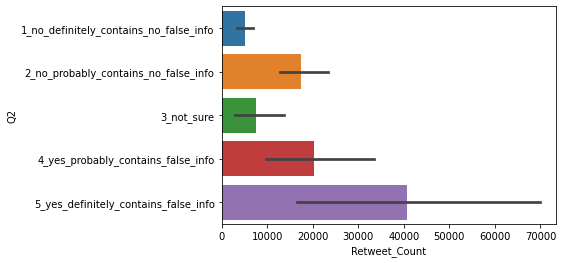

In [105]:
# To what extent does the tweet appear to contain false information?
sns.barplot(x='retweet_count', y='q2', data=q2)
plt.xlabel("Retweet_Count")
plt.ylabel("Q2")

Text(0, 0.5, 'Q2')

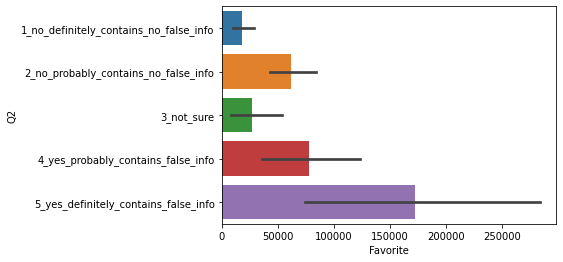

In [106]:
# To what extent does the tweet appear to contain false information?
sns.barplot(x='favorite_count', y='q2', data=q2, orient='h')
plt.xlabel("Favorite")
plt.ylabel("Q2")


Text(0, 0.5, 'Q3')

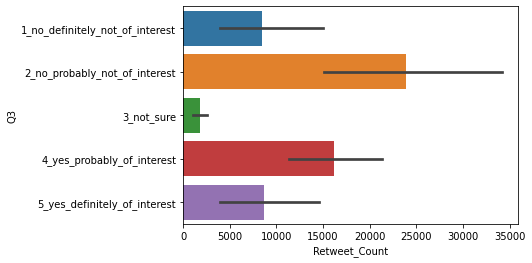

In [107]:
sns.barplot(x='retweet_count', y='q3', data=q3, orient='h')
plt.xlabel("Retweet_Count")
plt.ylabel("Q3")

Text(0, 0.5, 'Q3')

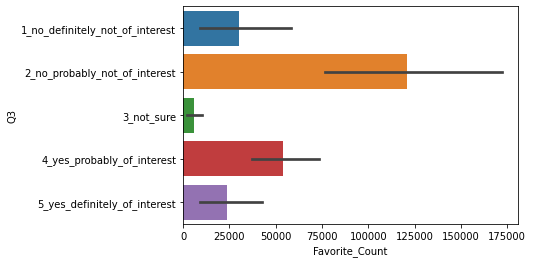

In [108]:
sns.barplot(x='favorite_count', y='q3', data=q3, orient='h')
plt.xlabel("Favorite_Count")
plt.ylabel("Q3")

Text(0, 0.5, 'Q4')

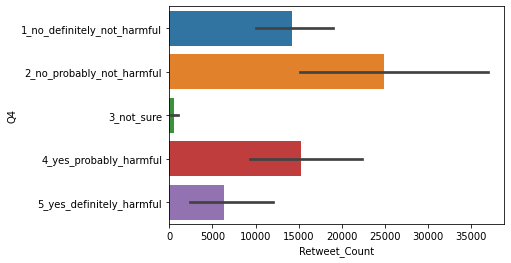

In [109]:
sns.barplot(x='retweet_count', y='q4', data=q4, orient='h')
plt.xlabel("Retweet_Count")
plt.ylabel("Q4")

Text(0, 0.5, 'Q5')

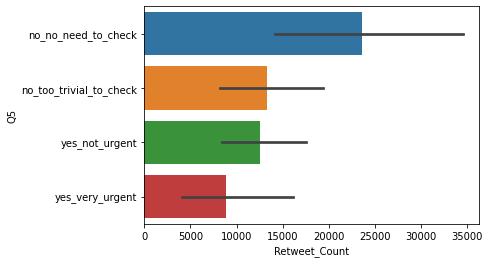

In [110]:
sns.barplot(x='retweet_count', y='q5', data=q5, orient='h')
plt.xlabel("Retweet_Count")
plt.ylabel("Q5")

Text(0, 0.5, 'Q6')

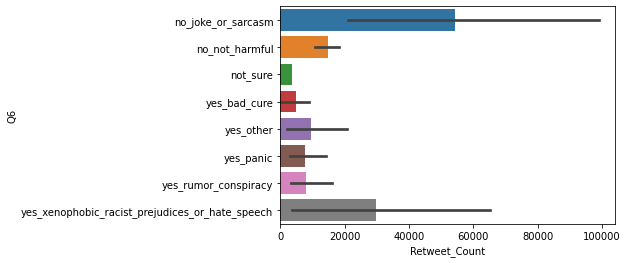

In [111]:
sns.barplot(x='retweet_count', y='q6', data=q6, orient='h')
plt.xlabel("Retweet_Count")
plt.ylabel("Q6")

Text(0, 0.5, 'Q7')

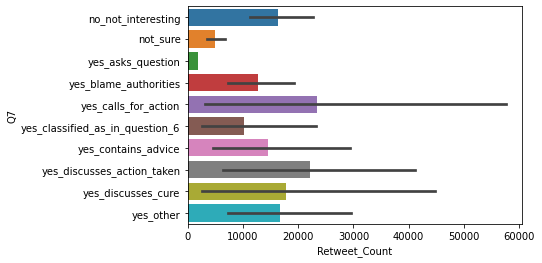

In [112]:
sns.barplot(x='retweet_count', y='q7', data=q7, orient='h')
plt.xlabel("Retweet_Count")
plt.ylabel("Q7")

In [113]:
verifiable_data

,created_at,tweet_id,retweet_count,favorite_count,text,q1,q2,q3,q4,q5,q6,q7
4,2020-03-21 19:30:08+00:00,1241447017945223169,126506,445713,This is the face of someone who just spent 9 h...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,1_no_definitely_not_harmful,yes_not_urgent,no_not_harmful,no_not_interesting
5,2020-03-22 08:06:20+00:00,1241637320325029889,128634,715158,Yesterday I knocked on my Tennant's door and t...,yes,2_no_probably_contains_no_false_info,2_no_probably_not_of_interest,1_no_definitely_not_harmful,no_no_need_to_check,no_not_harmful,no_not_interesting
7,2020-03-23 17:13:35+00:00,1242137430322446344,119536,331428,This is Dr. Usama Riaz. He spent past weeks sc...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,1_no_definitely_not_harmful,no_too_trivial_to_check,no_not_harmful,no_not_interesting
8,2020-03-19 19:09:28+00:00,1240717039377022977,141115,516085,fun fact: its tradition for europeans to sprea...,yes,5_yes_definitely_contains_false_info,4_yes_probably_of_interest,4_yes_probably_harmful,no_no_need_to_check,yes_xenophobic_racist_prejudices_or_hate_speech,yes_classified_as_in_question_6
11,2020-03-19 16:28:40+00:00,1240676575168921600,100742,322476,"So, the last week I have been battling COVID-1...",yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,2_no_probably_not_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities
...,...,...,...,...,...,...,...,...,...,...,...,...
484,2020-03-05 23:37:48+00:00,1235711139620753408,256,776,"Trump: Corona-flu is not serious, go to work i...",yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities
485,2020-03-05 16:14:52+00:00,1235599671571009536,486,414,"But, but...Trump didn’t prepare for the corona...",yes,4_yes_probably_contains_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,no_not_harmful,no_not_interesting
487,2020-03-06 16:35:12+00:00,1235967176475111432,168,278,President Trump's comments about the coronavir...,yes,4_yes_probably_contains_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,yes_rumor_conspiracy,no_not_interesting
488,2020-03-06 22:28:55+00:00,1236056191324864515,125,176,Drug companies reportedly killed a provision i...,yes,1_no_definitely_contains_no_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities


In [114]:
bearer_token = "AAAAAAAAAAAAAAAAAAAAAIArbwEAAAAAJdOV7Ra1CypyAjwWhpPYpdQX760%3DiRtqa7lHMvSsZVu76Vd3nDSJADjrnUlioPrrKUJdZafjLTszbk"

client = tweepy.Client(bearer_token)

# Get Tweets

# This endpoint/method returns a variety of information about the Tweet(s)
# specified by the requested ID or list of IDs

tweet_ids = verifiable_data['tweet_id'].tolist()
num = len(tweet_ids)
num


299

In [115]:
split_lists = [tweet_ids[x:x+99] for x in range(0, len(tweet_ids), 99)]
len(split_lists)


4

In [116]:
new_df = pd.DataFrame(columns = ["tweet_id", "author_id","possibly_sensitive"])
new_df

,tweet_id,author_id,possibly_sensitive


In [117]:
for x in split_lists:
    response = client.get_tweets(x, tweet_fields=["author_id","possibly_sensitive"])
    for tweet in response.data:
        to_append = [tweet.id, tweet.author_id,tweet.possibly_sensitive]
        df_length = len(new_df)
        new_df.loc[df_length] = to_append
        
new_df

,tweet_id,author_id,possibly_sensitive
0,1241447017945223169,110453483,False
1,1241637320325029889,373511913,False
2,1242137430322446344,716432228,False
3,1240717039377022977,907769388627120129,False
4,1240676575168921600,1320327876,False
...,...,...,...
247,1236059762544070657,2876041031,False
248,1235711139620753408,215207998,False
249,1235967176475111432,15725659,False
250,1236056191324864515,1626904404,False


In [118]:
list_2_nodups = new_df.drop_duplicates()
list_2_nodups

,tweet_id,author_id,possibly_sensitive
0,1241447017945223169,110453483,False
1,1241637320325029889,373511913,False
2,1242137430322446344,716432228,False
3,1240717039377022977,907769388627120129,False
4,1240676575168921600,1320327876,False
...,...,...,...
247,1236059762544070657,2876041031,False
248,1235711139620753408,215207998,False
249,1235967176475111432,15725659,False
250,1236056191324864515,1626904404,False


In [119]:
newdf = verifiable_data.merge(new_df, how='inner')
newdf.set_index('author_id')

,created_at,tweet_id,retweet_count,favorite_count,text,q1,q2,q3,q4,q5,q6,q7,possibly_sensitive
author_id,,,,,,,,,,,,,
110453483,2020-03-21 19:30:08+00:00,1241447017945223169,126506,445713,This is the face of someone who just spent 9 h...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,1_no_definitely_not_harmful,yes_not_urgent,no_not_harmful,no_not_interesting,False
373511913,2020-03-22 08:06:20+00:00,1241637320325029889,128634,715158,Yesterday I knocked on my Tennant's door and t...,yes,2_no_probably_contains_no_false_info,2_no_probably_not_of_interest,1_no_definitely_not_harmful,no_no_need_to_check,no_not_harmful,no_not_interesting,False
716432228,2020-03-23 17:13:35+00:00,1242137430322446344,119536,331428,This is Dr. Usama Riaz. He spent past weeks sc...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,1_no_definitely_not_harmful,no_too_trivial_to_check,no_not_harmful,no_not_interesting,False
907769388627120129,2020-03-19 19:09:28+00:00,1240717039377022977,141115,516085,fun fact: its tradition for europeans to sprea...,yes,5_yes_definitely_contains_false_info,4_yes_probably_of_interest,4_yes_probably_harmful,no_no_need_to_check,yes_xenophobic_racist_prejudices_or_hate_speech,yes_classified_as_in_question_6,False
1320327876,2020-03-19 16:28:40+00:00,1240676575168921600,100742,322476,"So, the last week I have been battling COVID-1...",yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,2_no_probably_not_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876041031,2020-03-06 22:43:06+00:00,1236059762544070657,109,232,I’m old enough to remember when Trump did away...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,4_yes_probably_harmful,no_no_need_to_check,no_not_harmful,no_not_interesting,False
215207998,2020-03-05 23:37:48+00:00,1235711139620753408,256,776,"Trump: Corona-flu is not serious, go to work i...",yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities,False
15725659,2020-03-06 16:35:12+00:00,1235967176475111432,168,278,President Trump's comments about the coronavir...,yes,4_yes_probably_contains_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,yes_rumor_conspiracy,no_not_interesting,False


In [120]:
user_ids = newdf['author_id'].tolist()
user_ids
user_lists = [user_ids[x:x+99] for x in range(0, len(user_ids), 99)]
len(user_lists)

3

In [121]:
users_df = pd.DataFrame(columns = ["author_id","verified","created_at"])
users_df

,author_id,verified,created_at


In [122]:
for x in user_lists:
    response = client.get_users(ids=x, user_fields=["verified","created_at","id"])
    for user in response.data:
        to_append = [user.id, user.verified, user.created_at]
        df_length = len(users_df)
        users_df.loc[df_length] = to_append
        

users_df = users_df.rename(columns={'created_at': 'account_created'})
users_df.set_index('author_id')

,verified,account_created
author_id,,
110453483,False,2010-02-01 16:10:31+00:00
373511913,False,2011-09-14 18:18:39+00:00
716432228,False,2012-07-25 17:22:39+00:00
907769388627120129,False,2017-09-13 00:54:22+00:00
1320327876,False,2013-04-01 13:27:25+00:00
...,...,...
2876041031,False,2014-11-14 05:18:51+00:00
215207998,True,2010-11-13 08:33:44+00:00
15725659,True,2008-08-04 18:21:39+00:00


In [123]:
df3 = pd.merge(newdf, users_df, left_index=True, right_index=True)
df3

,created_at,tweet_id,retweet_count,favorite_count,text,q1,q2,q3,q4,q5,q6,q7,author_id_x,possibly_sensitive,author_id_y,verified,account_created
0,2020-03-21 19:30:08+00:00,1241447017945223169,126506,445713,This is the face of someone who just spent 9 h...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,1_no_definitely_not_harmful,yes_not_urgent,no_not_harmful,no_not_interesting,110453483,False,110453483,False,2010-02-01 16:10:31+00:00
1,2020-03-22 08:06:20+00:00,1241637320325029889,128634,715158,Yesterday I knocked on my Tennant's door and t...,yes,2_no_probably_contains_no_false_info,2_no_probably_not_of_interest,1_no_definitely_not_harmful,no_no_need_to_check,no_not_harmful,no_not_interesting,373511913,False,373511913,False,2011-09-14 18:18:39+00:00
2,2020-03-23 17:13:35+00:00,1242137430322446344,119536,331428,This is Dr. Usama Riaz. He spent past weeks sc...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,1_no_definitely_not_harmful,no_too_trivial_to_check,no_not_harmful,no_not_interesting,716432228,False,716432228,False,2012-07-25 17:22:39+00:00
3,2020-03-19 19:09:28+00:00,1240717039377022977,141115,516085,fun fact: its tradition for europeans to sprea...,yes,5_yes_definitely_contains_false_info,4_yes_probably_of_interest,4_yes_probably_harmful,no_no_need_to_check,yes_xenophobic_racist_prejudices_or_hate_speech,yes_classified_as_in_question_6,907769388627120129,False,907769388627120129,False,2017-09-13 00:54:22+00:00
4,2020-03-19 16:28:40+00:00,1240676575168921600,100742,322476,"So, the last week I have been battling COVID-1...",yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,2_no_probably_not_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities,1320327876,False,1320327876,False,2013-04-01 13:27:25+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2020-03-06 22:43:06+00:00,1236059762544070657,109,232,I’m old enough to remember when Trump did away...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,4_yes_probably_harmful,no_no_need_to_check,no_not_harmful,no_not_interesting,2876041031,False,2876041031,False,2014-11-14 05:18:51+00:00
248,2020-03-05 23:37:48+00:00,1235711139620753408,256,776,"Trump: Corona-flu is not serious, go to work i...",yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities,215207998,False,215207998,True,2010-11-13 08:33:44+00:00
249,2020-03-06 16:35:12+00:00,1235967176475111432,168,278,President Trump's comments about the coronavir...,yes,4_yes_probably_contains_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,yes_rumor_conspiracy,no_not_interesting,15725659,False,15725659,True,2008-08-04 18:21:39+00:00
250,2020-03-06 22:28:55+00:00,1236056191324864515,125,176,Drug companies reportedly killed a provision i...,yes,1_no_definitely_contains_no_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities,1626904404,False,1626904404,True,2013-07-28 03:29:03+00:00


In [124]:
df3.sort_values('account_created')

,created_at,tweet_id,retweet_count,favorite_count,text,q1,q2,q3,q4,q5,q6,q7,author_id_x,possibly_sensitive,author_id_y,verified,account_created
157,2020-03-04 11:34:18+00:00,1235166676309676032,3270,5088,The World Health Organization confirmed that C...,yes,2_no_probably_contains_no_false_info,5_yes_definitely_of_interest,4_yes_probably_harmful,yes_very_urgent,yes_other,yes_classified_as_in_question_6,1877831,False,1877831,True,2007-03-22 13:59:49+00:00
154,2020-03-04 16:22:08+00:00,1235239113298759680,6000,14222,Just spoke with ER doc who say he's seeing cas...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,4_yes_probably_harmful,yes_not_urgent,yes_panic,yes_classified_as_in_question_6,2030711,False,2030711,True,2007-03-23 17:05:29+00:00
26,2020-03-24 19:56:16+00:00,1242540756209774592,23974,54362,Breaking: A child under the age of 18 has died...,yes,2_no_probably_contains_no_false_info,5_yes_definitely_of_interest,1_no_definitely_not_harmful,yes_not_urgent,no_not_harmful,yes_other,2267241,False,2267241,True,2007-03-26 07:14:42+00:00
113,2020-03-06 22:40:26+00:00,1236059089630908419,5618,16982,After weeks of the Federal Government dragging...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities,4207961,False,4207961,True,2007-04-11 16:43:58+00:00
172,2020-03-09 02:11:39+00:00,1236837019336269826,9652,41935,Just got a look of guidlines for testing COVID...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,4_yes_probably_harmful,yes_very_urgent,yes_other,yes_blame_authorities,4207961,False,4207961,True,2007-04-11 16:43:58+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2020-03-22 11:11:29+00:00,1241683913535148032,1036,1292,#FakeNews Alert #PIBFactCheck: The claim that...,yes,1_no_definitely_contains_no_false_info,5_yes_definitely_of_interest,1_no_definitely_not_harmful,yes_not_urgent,no_not_harmful,no_not_interesting,1207634475254865921,False,1207634475254865921,True,2019-12-19 12:12:30+00:00
68,2020-03-24 08:51:38+00:00,1242373497948491776,812,1737,An online website has falsely reported that th...,yes,1_no_definitely_contains_no_false_info,5_yes_definitely_of_interest,1_no_definitely_not_harmful,yes_not_urgent,no_not_harmful,no_not_interesting,1207634475254865921,False,1207634475254865921,True,2019-12-19 12:12:30+00:00
80,2020-03-23 08:14:19+00:00,1242001719996739584,615,1094,Government of India issues advisory to all soc...,yes,2_no_probably_contains_no_false_info,5_yes_definitely_of_interest,1_no_definitely_not_harmful,no_no_need_to_check,no_not_harmful,yes_discusses_action_taken,1207634475254865921,False,1207634475254865921,True,2019-12-19 12:12:30+00:00
219,2020-03-11 00:59:39+00:00,1237543674675728386,3255,4436,Update of confirmed #COVID19 cases outside of ...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,1_no_definitely_not_harmful,no_too_trivial_to_check,no_not_harmful,no_not_interesting,1232793749324955648,False,1232793749324955648,False,2020-02-26 22:27:22+00:00


In [128]:
self.df3["account_created"] = pd.to_datetime(self.df3["account_created"]).dt.date

AttributeError: module 'self' has no attribute 'df3'

In [127]:
pd.Timestamp('today').floor('D')

Timestamp('2022-04-25 00:00:00')

In [129]:
df3['account_age'] = np.where(df3['account_created'] >= pd.Timestamp("2019-08-01 00:00:00+00:00"), 'New', 'Old')
df3


In [130]:
df3

,created_at,tweet_id,retweet_count,favorite_count,text,q1,q2,q3,q4,q5,q6,q7,author_id_x,possibly_sensitive,author_id_y,verified,account_created,account_age
0,2020-03-21 19:30:08+00:00,1241447017945223169,126506,445713,This is the face of someone who just spent 9 h...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,1_no_definitely_not_harmful,yes_not_urgent,no_not_harmful,no_not_interesting,110453483,False,110453483,False,2010-02-01 16:10:31+00:00,Old
1,2020-03-22 08:06:20+00:00,1241637320325029889,128634,715158,Yesterday I knocked on my Tennant's door and t...,yes,2_no_probably_contains_no_false_info,2_no_probably_not_of_interest,1_no_definitely_not_harmful,no_no_need_to_check,no_not_harmful,no_not_interesting,373511913,False,373511913,False,2011-09-14 18:18:39+00:00,Old
2,2020-03-23 17:13:35+00:00,1242137430322446344,119536,331428,This is Dr. Usama Riaz. He spent past weeks sc...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,1_no_definitely_not_harmful,no_too_trivial_to_check,no_not_harmful,no_not_interesting,716432228,False,716432228,False,2012-07-25 17:22:39+00:00,Old
3,2020-03-19 19:09:28+00:00,1240717039377022977,141115,516085,fun fact: its tradition for europeans to sprea...,yes,5_yes_definitely_contains_false_info,4_yes_probably_of_interest,4_yes_probably_harmful,no_no_need_to_check,yes_xenophobic_racist_prejudices_or_hate_speech,yes_classified_as_in_question_6,907769388627120129,False,907769388627120129,False,2017-09-13 00:54:22+00:00,Old
4,2020-03-19 16:28:40+00:00,1240676575168921600,100742,322476,"So, the last week I have been battling COVID-1...",yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,2_no_probably_not_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities,1320327876,False,1320327876,False,2013-04-01 13:27:25+00:00,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2020-03-06 22:43:06+00:00,1236059762544070657,109,232,I’m old enough to remember when Trump did away...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,4_yes_probably_harmful,no_no_need_to_check,no_not_harmful,no_not_interesting,2876041031,False,2876041031,False,2014-11-14 05:18:51+00:00,Old
248,2020-03-05 23:37:48+00:00,1235711139620753408,256,776,"Trump: Corona-flu is not serious, go to work i...",yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities,215207998,False,215207998,True,2010-11-13 08:33:44+00:00,Old
249,2020-03-06 16:35:12+00:00,1235967176475111432,168,278,President Trump's comments about the coronavir...,yes,4_yes_probably_contains_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,yes_rumor_conspiracy,no_not_interesting,15725659,False,15725659,True,2008-08-04 18:21:39+00:00,Old
250,2020-03-06 22:28:55+00:00,1236056191324864515,125,176,Drug companies reportedly killed a provision i...,yes,1_no_definitely_contains_no_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities,1626904404,False,1626904404,True,2013-07-28 03:29:03+00:00,Old


In [131]:
df3.sort_values('account_created')

,created_at,tweet_id,retweet_count,favorite_count,text,q1,q2,q3,q4,q5,q6,q7,author_id_x,possibly_sensitive,author_id_y,verified,account_created,account_age
157,2020-03-04 11:34:18+00:00,1235166676309676032,3270,5088,The World Health Organization confirmed that C...,yes,2_no_probably_contains_no_false_info,5_yes_definitely_of_interest,4_yes_probably_harmful,yes_very_urgent,yes_other,yes_classified_as_in_question_6,1877831,False,1877831,True,2007-03-22 13:59:49+00:00,Old
154,2020-03-04 16:22:08+00:00,1235239113298759680,6000,14222,Just spoke with ER doc who say he's seeing cas...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,4_yes_probably_harmful,yes_not_urgent,yes_panic,yes_classified_as_in_question_6,2030711,False,2030711,True,2007-03-23 17:05:29+00:00,Old
26,2020-03-24 19:56:16+00:00,1242540756209774592,23974,54362,Breaking: A child under the age of 18 has died...,yes,2_no_probably_contains_no_false_info,5_yes_definitely_of_interest,1_no_definitely_not_harmful,yes_not_urgent,no_not_harmful,yes_other,2267241,False,2267241,True,2007-03-26 07:14:42+00:00,Old
113,2020-03-06 22:40:26+00:00,1236059089630908419,5618,16982,After weeks of the Federal Government dragging...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities,4207961,False,4207961,True,2007-04-11 16:43:58+00:00,Old
172,2020-03-09 02:11:39+00:00,1236837019336269826,9652,41935,Just got a look of guidlines for testing COVID...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,4_yes_probably_harmful,yes_very_urgent,yes_other,yes_blame_authorities,4207961,False,4207961,True,2007-04-11 16:43:58+00:00,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2020-03-22 11:11:29+00:00,1241683913535148032,1036,1292,#FakeNews Alert #PIBFactCheck: The claim that...,yes,1_no_definitely_contains_no_false_info,5_yes_definitely_of_interest,1_no_definitely_not_harmful,yes_not_urgent,no_not_harmful,no_not_interesting,1207634475254865921,False,1207634475254865921,True,2019-12-19 12:12:30+00:00,New
68,2020-03-24 08:51:38+00:00,1242373497948491776,812,1737,An online website has falsely reported that th...,yes,1_no_definitely_contains_no_false_info,5_yes_definitely_of_interest,1_no_definitely_not_harmful,yes_not_urgent,no_not_harmful,no_not_interesting,1207634475254865921,False,1207634475254865921,True,2019-12-19 12:12:30+00:00,New
80,2020-03-23 08:14:19+00:00,1242001719996739584,615,1094,Government of India issues advisory to all soc...,yes,2_no_probably_contains_no_false_info,5_yes_definitely_of_interest,1_no_definitely_not_harmful,no_no_need_to_check,no_not_harmful,yes_discusses_action_taken,1207634475254865921,False,1207634475254865921,True,2019-12-19 12:12:30+00:00,New
219,2020-03-11 00:59:39+00:00,1237543674675728386,3255,4436,Update of confirmed #COVID19 cases outside of ...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,1_no_definitely_not_harmful,no_too_trivial_to_check,no_not_harmful,no_not_interesting,1232793749324955648,False,1232793749324955648,False,2020-02-26 22:27:22+00:00,New
